In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

In [7]:
# CSVファイルからデータを読み込む with 'utf-8' encoding
df = pd.read_csv(fr'C:\Users\100ca\Documents\PyCode\scraping\data\OS.csv', encoding='utf-8')

# '情報なし'や'---'などのデータをNaNに変換
df.replace({'情報なし': None, '---': None}, inplace=True)

# 数値データの列をfloat型に変換
numerical_cols = ['salary', 'overtime', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']

# Replace non-numeric values in these columns with NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

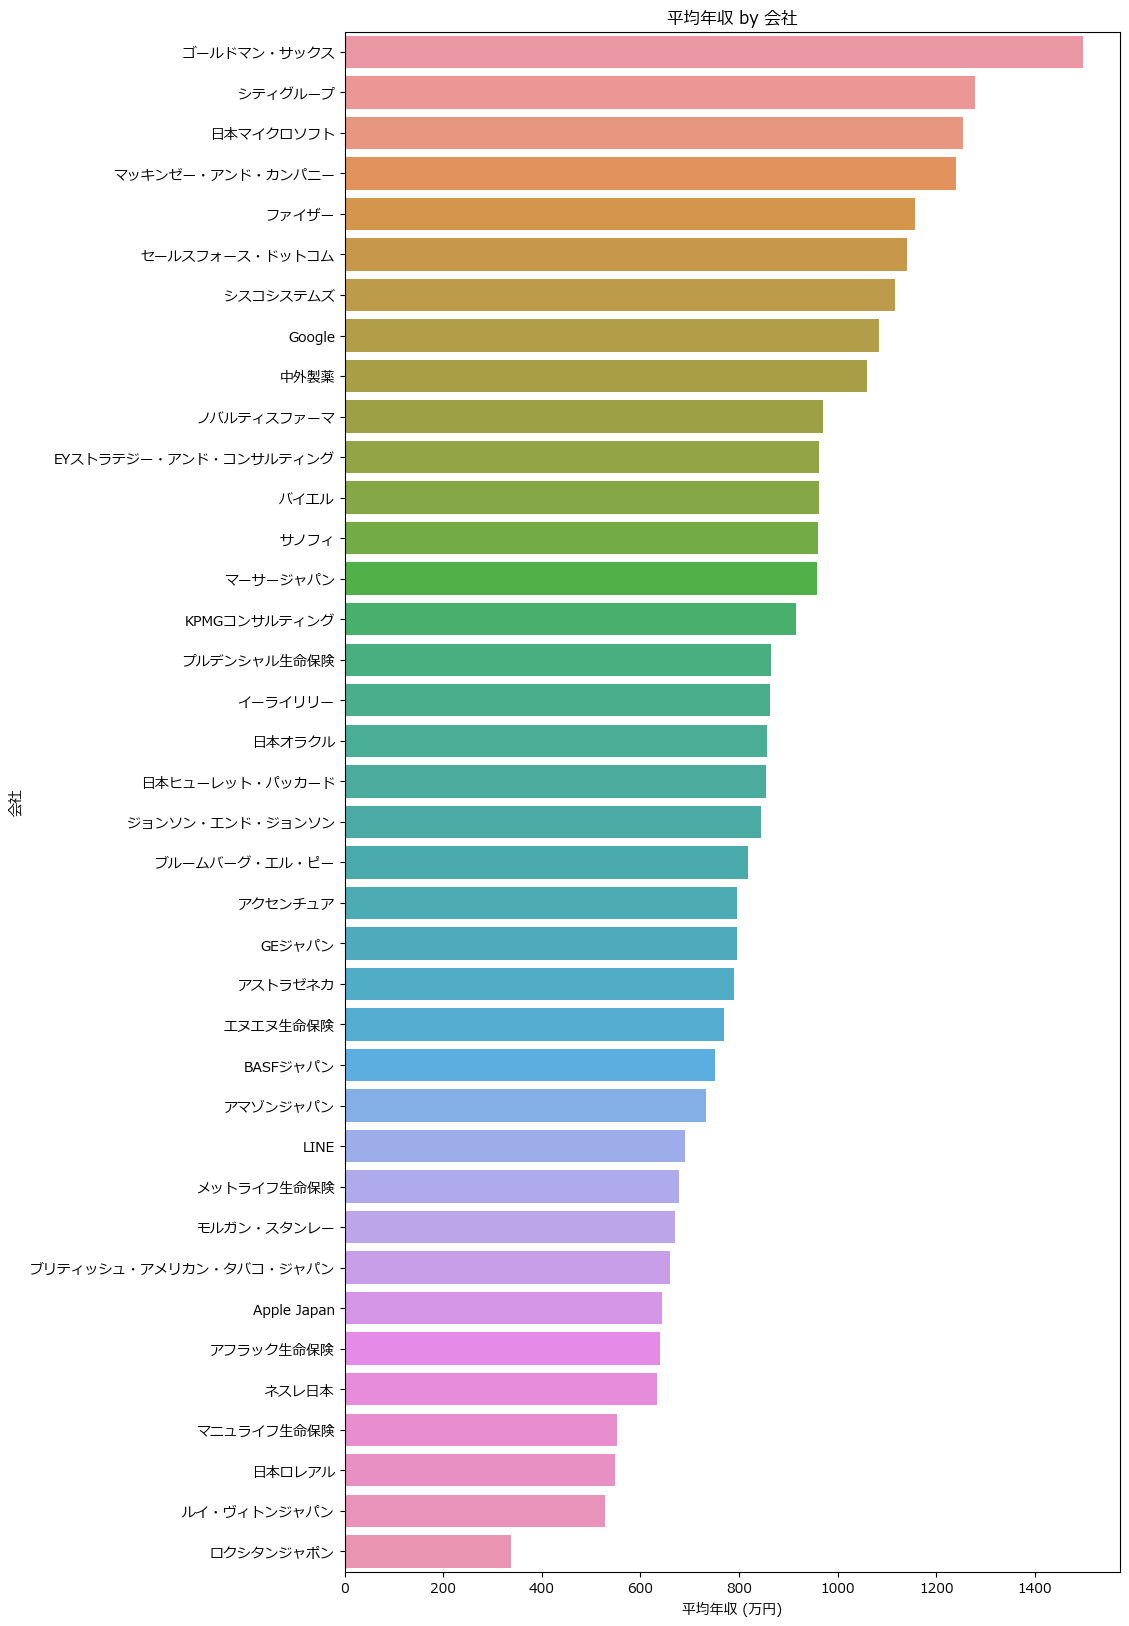

In [9]:
plt.figure(figsize=(10, 20))

# 'salary' 列の欠損値を持つ行を削除し、'salary' の値で降順にソート
df = df.dropna(subset=['salary']).sort_values('salary', ascending=False)

# 水平棒グラフをプロット
sns.barplot(x='salary', y='company', data=df)

plt.title('平均年収 by 会社')
plt.xlabel('平均年収 (万円)')
plt.ylabel('会社')
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


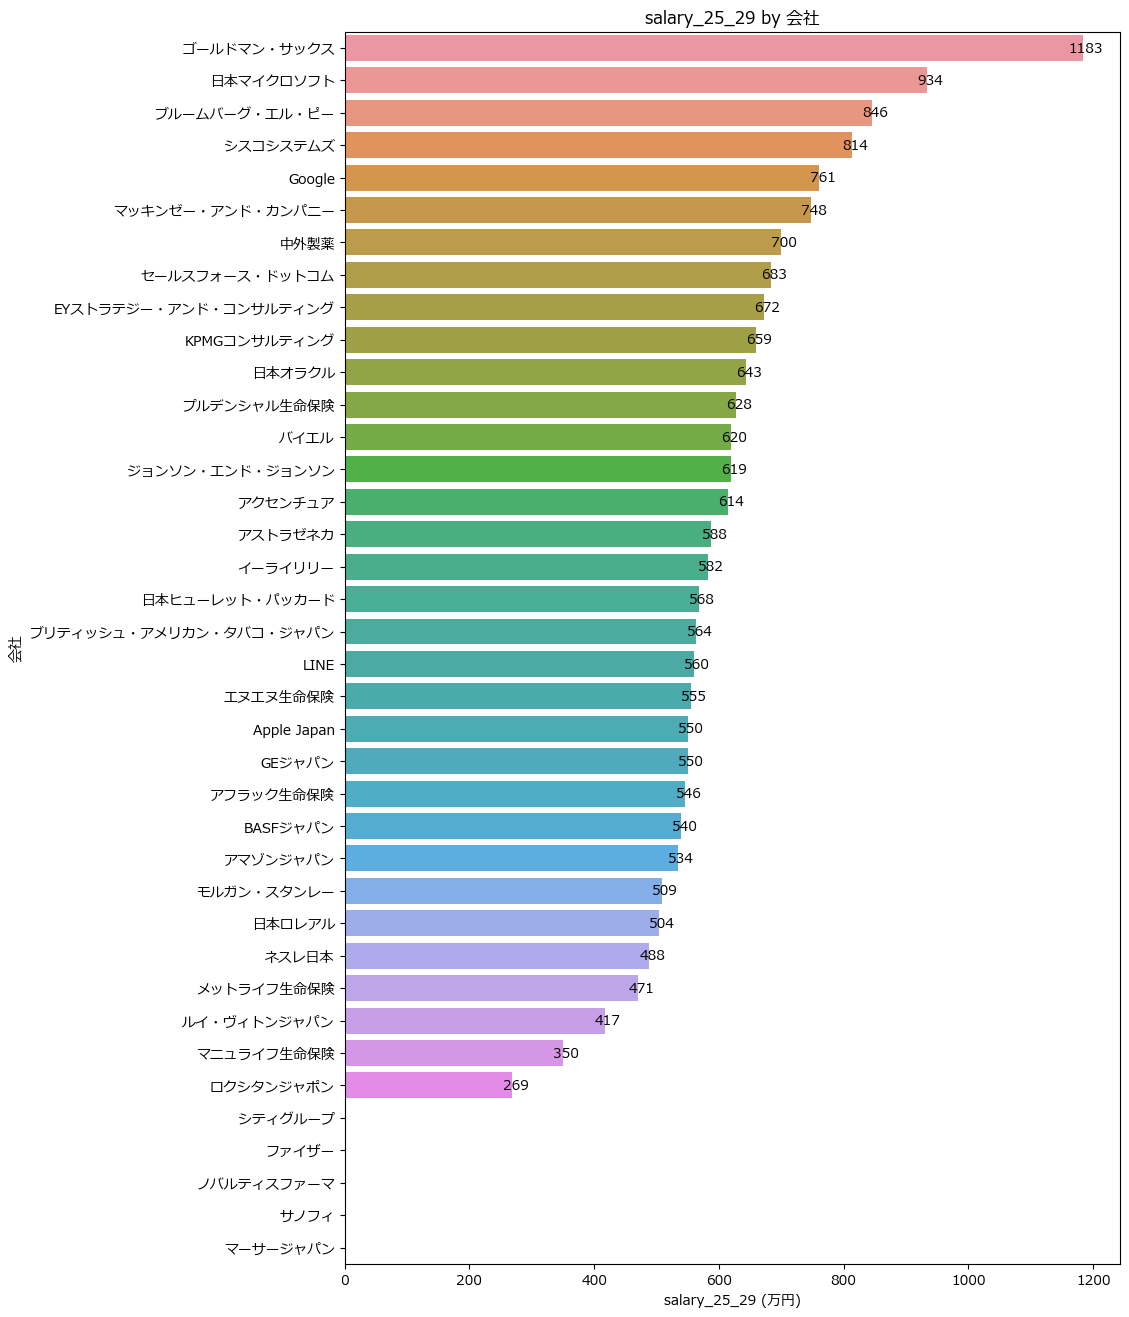

In [17]:
plt.figure(figsize=(10, 16))

# データを 'salary_25_29' 列でソートし、上位100件を取得
sorted_df = df.sort_values('salary_25_29', ascending=False).head(100)

# 水平棒グラフをプロット
barplot = sns.barplot(x='salary_25_29', y='company', data=sorted_df)

plt.title('salary_25_29 by 会社')
plt.xlabel('salary_25_29 (万円)')
plt.ylabel('会社')

# 各バーに値をアノテーションとして追加
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5,  # アノテーションのx位置
             p.get_y() + p.get_height() / 2,  # アノテーションのy位置
             '{:1.0f}'.format(width),  # アノテーションのテキスト（バーの幅）
             ha='center', va='center')

plt.show()


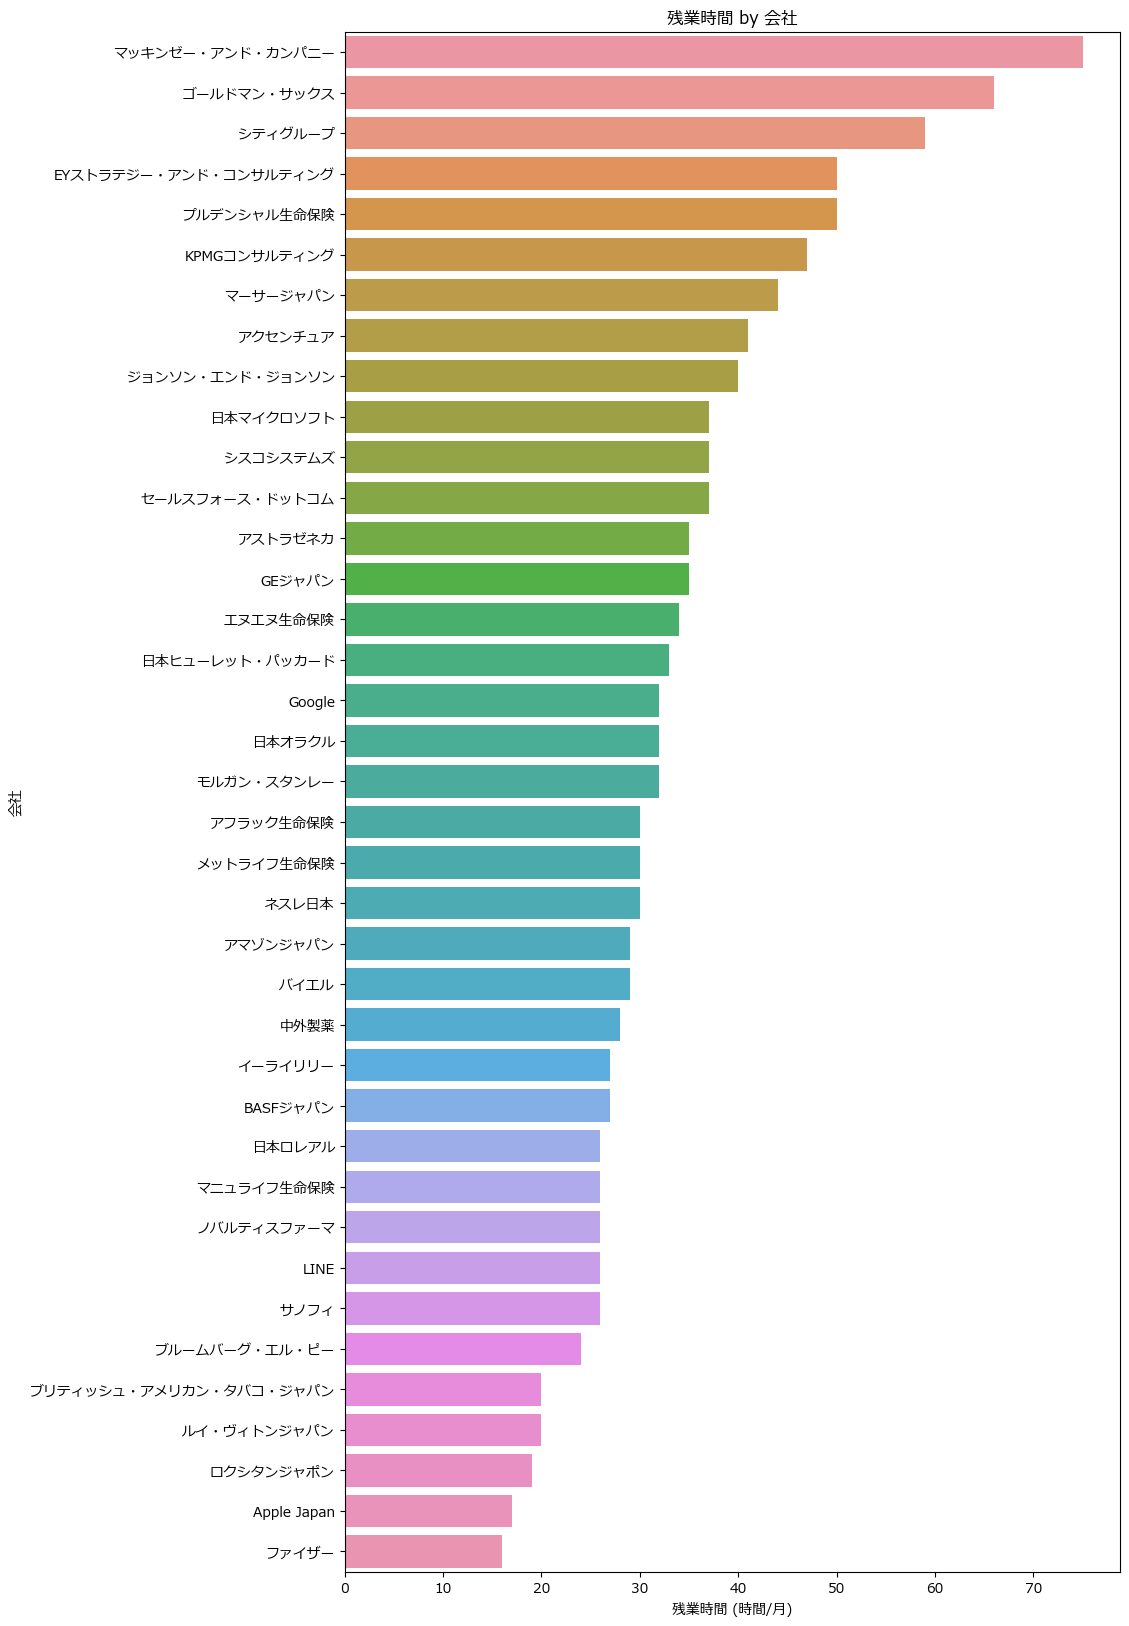

In [11]:
plt.figure(figsize=(10, 20))
sns.barplot(x='overtime', y='company', data=df.sort_values('overtime', ascending=False).head(100))
plt.title('残業時間 by 会社')
plt.xlabel('残業時間 (時間/月)')
plt.ylabel('会社')
plt.show()


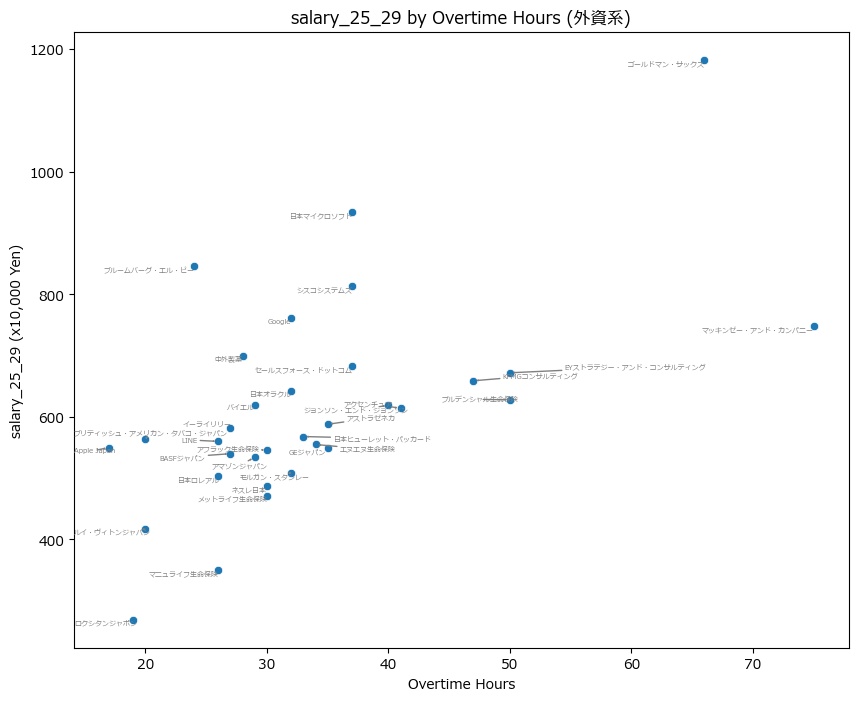

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

plt.figure(figsize=(10, 8))

# 残業時間と給与の関係を散布図で表示
scatter = sns.scatterplot(x='overtime', y='salary_25_29', data=df)

texts = []
for i in range(len(df)):
    # 有限値（finite value）であることを確認し、y軸の範囲内にあるデータのみをアノテーションする
    if pd.notnull(df.overtime.iloc[i]) and pd.notnull(df.salary_25_29.iloc[i]):
        text = plt.text(x=df.overtime.iloc[i], y=df.salary_25_29.iloc[i], s=df.company.iloc[i], 
                        fontdict=dict(color='grey',size=5))
        texts.append(text)

plt.title('salary_25_29 by Overtime Hours (外資系)')
plt.xlabel('Overtime Hours')
plt.ylabel('salary_25_29 (x10,000 Yen)')

# テキストのオーバーラップを避ける
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


c:\Users\100ca\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


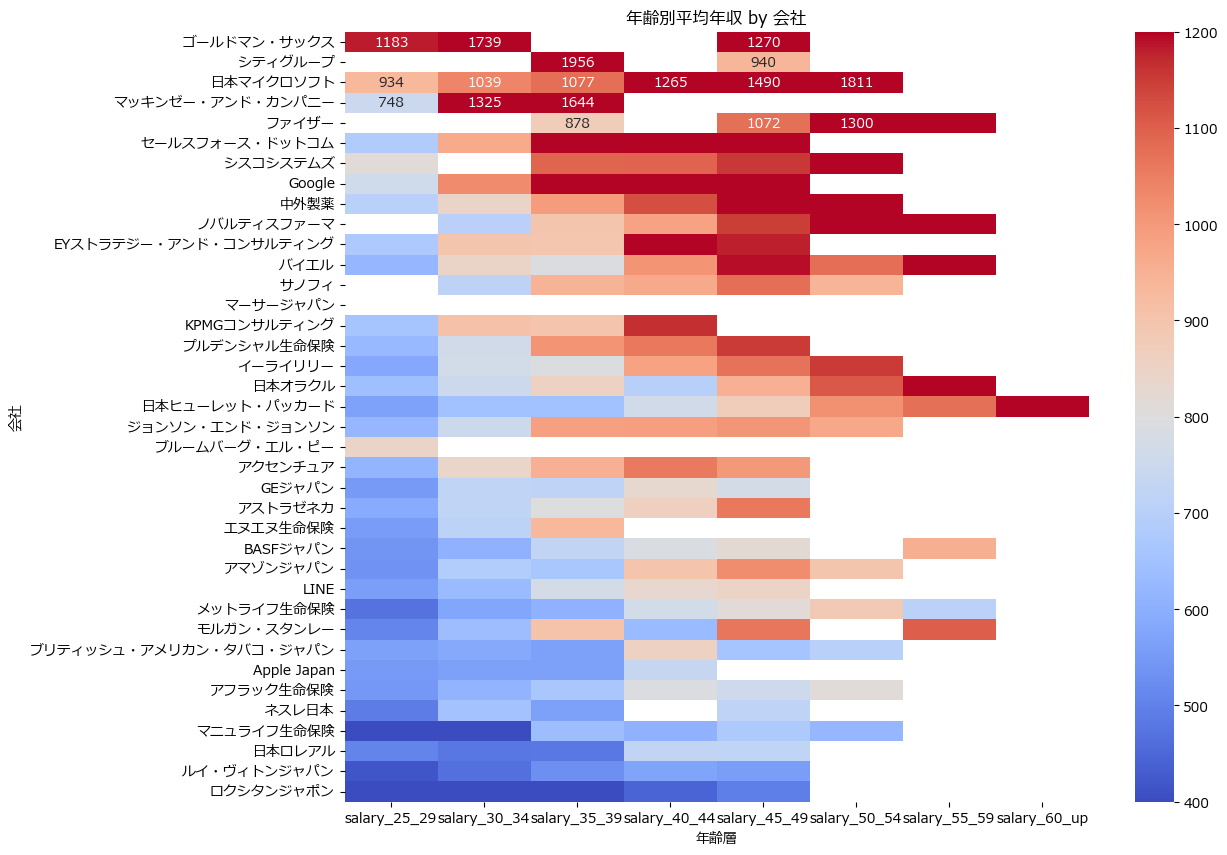

In [13]:
age_salary_df = df[['company', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']]

plt.figure(figsize=(12, 10))
sns.heatmap(age_salary_df.set_index('company'), annot=True, fmt=".0f", cmap='coolwarm', vmin=400, vmax=1200)
plt.title('年齢別平均年収 by 会社')
plt.xlabel('年齢層')
plt.ylabel('会社')
plt.show()


In [14]:
df.sort_values(by='salary_25_29',ascending=False).head(50)

,company,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
6,ゴールドマン・サックス,1497.0,66.0,1183.0,1739.0,NaN,NaN,1270.0,NaN,NaN,NaN
37,日本マイクロソフト,1255.0,37.0,934.0,1039.0,1077.0,1265.0,1490.0,1811.0,NaN,NaN
42,ブルームバーグ・エル・ピー,819.0,24.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,シスコシステムズ,1116.0,37.0,814.0,NaN,1093.0,1094.0,1156.0,1356.0,NaN,NaN
35,Google,1085.0,32.0,761.0,1027.0,1200.0,1200.0,1667.0,NaN,NaN,NaN
3,マッキンゼー・アンド・カンパニー,1240.0,75.0,748.0,1325.0,1644.0,NaN,NaN,NaN,NaN,NaN
17,中外製薬,1060.0,28.0,700.0,845.0,996.0,1126.0,1360.0,1312.0,NaN,NaN
40,セールスフォース・ドットコム,1140.0,37.0,683.0,963.0,1300.0,1316.0,2011.0,NaN,NaN,NaN
1,EYストラテジー・アンド・コンサルティング,963.0,50.0,672.0,899.0,895.0,1581.0,1179.0,NaN,NaN,NaN
0,KPMGコンサルティング,915.0,47.0,659.0,908.0,902.0,1164.0,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
count,38.000000,38.000000,33.000000,33.000000,35.000000,30.000000,32.000000,16.000000,8.000000,1.0
mean,865.315789,34.000000,614.212121,755.212121,866.657143,920.033333,1018.750000,1076.500000,1102.125000,1708.0
std,242.024804,12.861003,167.945072,263.097387,313.529053,244.928347,316.973999,292.765207,193.187871,NaN
min,338.000000,16.000000,269.000000,356.000000,388.000000,444.000000,494.000000,621.000000,709.000000,1708.0
25%,681.750000,26.000000,540.000000,610.000000,658.000000,763.750000,802.500000,894.000000,1044.500000,1708.0
50%,849.500000,31.000000,582.000000,713.000000,854.000000,881.500000,1015.500000,1046.000000,1156.500000,1708.0
75%,968.250000,37.000000,672.000000,845.000000,968.500000,1059.250000,1153.000000,1270.750000,1231.250000,1708.0
max,1497.000000,75.000000,1183.000000,1739.000000,1956.000000,1581.000000,2011.000000,1811.000000,1290.000000,1708.0
